<a href="https://colab.research.google.com/github/ALEJODATA/PYTHON-PROJECTS/blob/main/Pokemon_Speed_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load The Dataset

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d abcsds/pokemon
!unzip pokemon.zip

In [ ]:
!git clone https://github.com/ALEJODATA/PYTHON-PROJECTS.git

fatal: destination path 'PYTHON-PROJECTS' already exists and is not an empty directory.


In [ ]:
import pandas as pd

original_df = pd.read_csv('/content/PYTHON-PROJECTS/Pokemon.csv')

original_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


#2. Select Feautures#

In [ ]:
modified_df = original_df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]

modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


#3. Split into 3 Partitions: Train,Val & Test

In [ ]:
shuffled_df = modified_df.sample(frac=1) #we don't loose any data, we just moving them around

shuffled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
632,60,105,60,120,60,105
362,50,85,40,85,40,35
6,78,84,78,109,85,100
779,85,110,76,65,82,56
164,106,150,70,194,120,140


In [ ]:
train_df = shuffled_df[:500]
val_df   = shuffled_df[500:650]
test_df  = shuffled_df[650:]

len(train_df), len(val_df), len(test_df)

(500, 150, 150)

In [ ]:
X_train, y_train = train_df.to_numpy()[:,:-1],train_df.to_numpy()[:,-1]
X_val, y_val = val_df.to_numpy()[:,:-1],val_df.to_numpy()[:,-1]
X_test, y_test = test_df.to_numpy()[:,:-1],test_df.to_numpy()[:,-1]

#Shows the (rows,columns of X,column in Y)

(X_train.shape,y_train.shape),(X_val.shape, y_val.shape),(X_test.shape, y_test.shape)

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

#4. Preprocess The Inputs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3daf1fc50>,
      dtype=object)

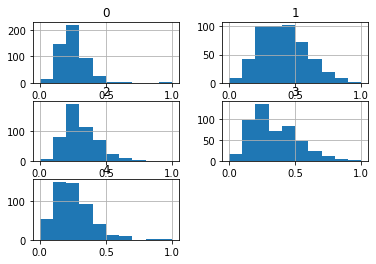

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled, X_val_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

pd.DataFrame(X_train_scaled).hist()

#5. Pick The Best Model w/ Lowest Validation Error

In [ ]:
from sklearn.metrics import mean_absolute_error

average_speed = y_train.mean()

mean_absolute_error(y_val, [average_speed]*len(y_val))

23.77629333333333

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

mean_absolute_error(y_val, linear_model.predict(X_val))

17.87233977467747

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(X_train, y_train)

mean_absolute_error(y_val, random_forest.predict(X_val))

17.7938

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 17298.6953 - mean_absolute_error: 123.8139 - val_loss: 10105.4717 - val_mean_absolute_error: 92.7197
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 6181.6641 - mean_absolute_error: 69.5477 - val_loss: 3146.6604 - val_mean_absolute_error: 46.9748
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 1863.1094 - mean_absolute_error: 34.8793 - val_loss: 1392.2491 - val_mean_absolute_error: 28.7542
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 1044.6697 - mean_absolute_error: 25.9418 - val_loss: 1258.0906 - val_mean_absolute_error: 28.1099
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1027.1804 - mean_absolute_error: 25.6851 - val_loss: 1252.4094 - val_mean_absolute_error: 28.1156
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 1016.4632 - mean_absolute_error: 25.5378 - val_loss: 1216.7406 - val

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 3736.1914 - mean_absolute_error: 47.5728 - val_loss: 1689.0916 - val_mean_absolute_error: 33.0781
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 1049.0369 - mean_absolute_error: 26.1123 - val_loss: 658.0047 - val_mean_absolute_error: 20.1914
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 758.6064 - mean_absolute_error: 21.4666 - val_loss: 614.3162 - val_mean_absolute_error: 19.2423
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 687.7557 - mean_absolute_error: 20.6964 - val_loss: 674.2864 - val_mean_absolute_error: 19.9339
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 669.8744 - mean_absolute_error: 20.5894 - val_loss: 630.1340 - val_mean_absolute_error: 19.4327
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 660.0997 - mean_absolute_error: 20.5078 - val_loss: 632.9877 - val_mean_absolu

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                192       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


Conclusion: In this case, linea regression is the best model because the mean_absolute_error is the lowest one, so as the easiest model of all (vs random forest and the 2 deep learning models used with tensorflow)

#6. Evaluate The Chosen Model

In [ ]:
mean_absolute_error(y_test,linear_model.predict(X_test))

19.8815728615939